In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression








In [2]:
calhouse = pd.read_csv('cal_housingdata-clean.csv')
calhouse.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,expensive
0,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.19,14999.0,0.0
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.10,14999.0,0.0
2,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.66,14999.0,0.0
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.54,14999.0,0.0
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.37,17500.0,0.0


In [3]:


X = calhouse[["medianIncome", "households", "totalBedrooms"]]
y = calhouse["medianHouseValue"].values.reshape(-1, 1)
print(X.shape, y.shape)
A=X
b=y
X

(20640, 3) (20640, 1)


,medianIncome,households,totalBedrooms
0,4.19,225.0,267.0
1,2.10,164.0,239.0
2,1.66,38.0,73.0
3,0.54,8.0,28.0
4,2.37,138.0,168.0
5,2.71,1439.0,1743.0
6,2.68,63.0,73.0
7,1.09,375.0,451.0
8,0.79,53.0,79.0
9,0.86,27.0,33.0


# Multiple Linear Regression

Multiple Linear Regression simply means that you have more than one feature variable.

For the Housing Price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Generate a linear dataset with 3 features

In [4]:
from sklearn.datasets import make_regression

#n_features = 3
#X, y = make_regression(n_samples=30, n_features=n_features, 
#                     n_informative=n_features, random_state=42, 
#                       noise=0.5, bias=100.0)

print(X.shape)
df = pd.DataFrame(data=X)
#del df['index']

print (df)


(20640, 3)
       medianIncome  households  totalBedrooms
0              4.19       225.0          267.0
1              2.10       164.0          239.0
2              1.66        38.0           73.0
3              0.54         8.0           28.0
4              2.37       138.0          168.0
5              2.71      1439.0         1743.0
6              2.68        63.0           73.0
7              1.09       375.0          451.0
8              0.79        53.0           79.0
9              0.86        27.0           33.0
10             2.30       294.0          309.0
11             2.20       482.0          543.0
12             1.27        15.0           24.0
13             2.74      2826.0         3114.0
14             2.64       177.0          183.0
15             1.21       182.0          448.0
16             4.02        20.0           49.0
17             1.85       382.0          422.0
18             1.83       288.0          332.0
19             1.64       253.0          275.0
20

In [5]:
#X=X.values


With 3 or more dimensions, it becomes harder to visualize the linear trends in our data

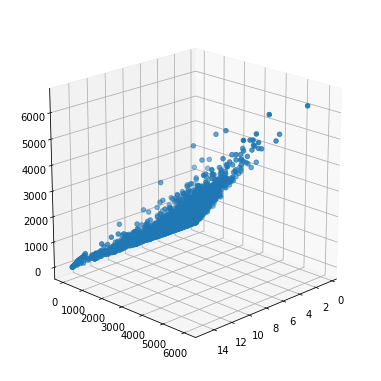

In [6]:
from mpl_toolkits.mplot3d import Axes3D
X=X.values
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

We can still visualize 3 features as a 3D plot, but what about n-dimensions? This becomes very difficult for the human brain to visualize. 

We could pick just one feature from X to fit our model, but what we really want it to find a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) or a computational approach [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) for estimating the parameters. Note that there are [tradeoffs](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent) between using either approach. The Linear Regression model in Sklearn uses the Ordinary Least Squares method.

Luckily, we can just supply our n-dimensional features and sklearn will fit the model using all of our features.

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.47669944953079013


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

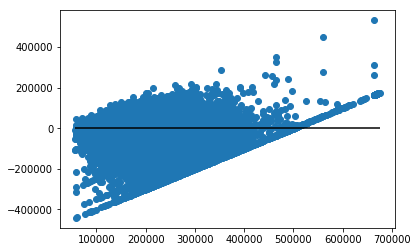

In [8]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [9]:
#We want our predictions to be close to zero on the y-axis in this plot.

In [10]:
#ELASTICNET ANALYSIS

In [11]:
#X, y = make_regression(n_features=2, random_state=0)
# A and b are same as X and y

regr = ElasticNet(random_state=0)

#n12 = np.squeeze(np.asarray(n2))

#X12 = np.squeeze(np.asarray(x1))

regr.fit(A, b)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
      
print(regr.coef_) 

print(regr.intercept_) 

#print(regr.predict([[0,0]])) 

[ 3.66319188e+04  2.73991022e+01 -9.16333320e+00]
[56298.19716003]
